# Lab 9 - Numerical Integration
## April 17 - April 19, 2023
## Student 1 Name: $\underline{KANISHK \ DAD\hspace{3in}}$ Student 1 ID No. $\underline{202103005\hspace{1.5in}}$
## Student 2 Name: $\underline{ADITYA \ TANNA\hspace{3in}}$ Student 2 ID No. $\underline{202103023\hspace{1.5in}}$
## Student 3 Name: $\underline{VRAJ \ THAKKAR\hspace{3in}}$ Student 3 ID No. $\underline{202103052\hspace{1.5in}}$
## Date of Submission: $\underline{19/04/23}$
***

In [68]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import roots_legendre
from scipy import integrate

In [80]:
a = int(input('a ='))
b = int(input('b ='))
n = int(input('n ='))
h = (b-a)/(n+1)
print('h = ',h)

a =1
b =2
n =100
h =  0.009900990099009901


### Q.1 Write a function `mytrapezoid` that takes in a function handle $f$, limits of the integral, $a$ and $b$, and the number of points $n$, where the function is to be sampled, and outputs the estimate of $I(f) = \int_a^b f(x)\ dx$ computed via the trapezoid rule. Use equi-distant $n$ samples between $a$ and $b$. These can be computed using `np.linspace`.

In [106]:
def f(x):
    return x**2

x = np.linspace(a, b, n+2)

def mytrapezoid(f,a,b,n):
    return (2*np.sum(f(x))- f(a)-f(b))*h/2  # subtraction has been done as f(a),f(b) are already addeded in np.sum()

integ = mytrapezoid(f,a,b,n)
print(integ)

2.3333496716008235


***
### Q.2 Write a function `mysimpson` that takes in a function handle $f$, limits of the integral, $a$ and $b$, and the number of points $n$, where the function is to be sampled, and outputs the estimate of $I(f) = \int_a^b f(x)\ dx$ computed via the Simpson's rule.

In [82]:
  def mysimpson(f, a, b, n):
    if n % 2 == 0:
        raise ValueError("The number of points n must be odd.")
    h = (b - a) / (n-1)
    x = np.linspace(a,b,n)
    y = f(x)
    # I = h/3 * (sum(4*y[i] + 2*y[i+1] for i in range(0, n, 2)) + y[0] + y[n-1])
    I =  sum(2*y[i] for i in range(2,n-2,2))+sum(4*y[i] for i in range(1,n-1,2))
    I_fin = (h/3)*(I+y[0]+y[n-1]) 
    return I_fin


mysimpson(f1,0,1,11)

0.5

***
### Q.3 Write a function `myGaussianint` that takes in a function handle $f$, limits of the integral, $a$ and $b$, and the number of points $n$, where the function is to be sampled, and outputs the estimate of $I(f) = \int_a^b f(x)\ dx$ computed via the Gaussian Numerical Integration rule. The points $x_i,i=1,\ldots,n$ and weights $w_i,i=1,\ldots,n$ can be computed using `x,w = roots_legendre(n)` (assuming you have compiled the first cell)

In [83]:
# Numerical integration by Gaussian Numerical integration method.

def myGaussianint( f, a, b, n):
    x,w = roots_legendre(n)

    scaled_x = ( (b-a)/2 ) * x + (a+b)/2
    
    return ( (b-a)/2 )*( np.sum( w * f(scaled_x) ))

area = myGaussianint( f, a, b, n)
print('area = ',area)

area =  2.3333333333333326


***
### Q.4 We know that the natural log satisfies: $\ln(x) = \int_{1}^x \frac{1}{t}\ dt,\ \ \forall x>0$. Plot the estimate the natural log of several points $x \in [0.25,10]$ using the estimates of the right hand side obtained through the Trapezoid, Simpson, and Gaussian numerical integration methods, and compare with the value obtained via `np.log`. Give a separate figure for $n=1,5,9,13$. Assuming the value obtained from `np.log` as the true value, compare (by plotting) the errors for each method for each value of $n$.

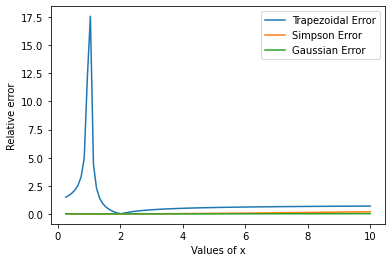

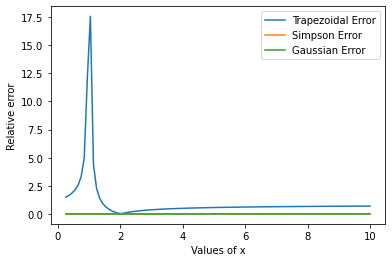

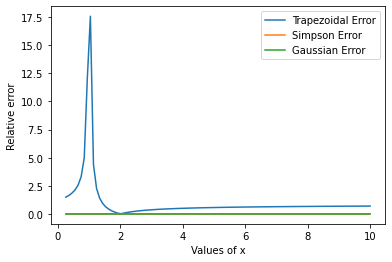

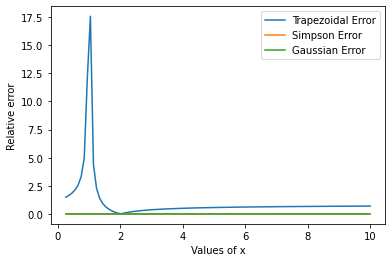

In [107]:
### Compute ln(x) via the three integration estimates of (1/t) and compare with 
### np.log(x).
def myinvt(t):
    return 1/t

### Compute integral of myinv(t) using the three methods and compare with np.log(x)

# First for n=1


i=1# we take 500 points in the range given
points_of_x = np.linspace(0.25, 10, 100)


for i in range(3,16,4):
    trap = []  # defining for trapezoidal method
    trap_error = []

    simp = []  # defining for simpson's method
    simp_error = []

    gaussian = []  # defining for gaussian method
    gaussian_error = []

    log_Value = []  # true value of log for all the points

    for j in points_of_x:
#         log_Value.append(np.log(j))

#         trap.append(mytrapezoid(myinvt, 1,j, i))
#         simp.append(mysimpson(myinvt, 1,j, i))
#         gaussian.append(myGaussianint(myinvt, 1, j,i))
    
    
        trap_error.append(abs(np.log(j)-mytrapezoid(myinvt, 1, j, i))/abs(np.log(j)))
        simp_error.append(abs(np.log(j)-mysimpson(myinvt, 1, j, i))/abs(np.log(j)))
        gaussian_error.append(abs(np.log(j)-myGaussianint(myinvt, 1,j, i))/abs(np.log(j)))


#     plt.plot(points_of_x, trap, label='Trapezoidal')
#     plt.plot(points_of_x, simp, label='Simpson')
#     plt.plot(points_of_x, gaussian, label='Gaussian')
    plt.plot(points_of_x, trap_error, label='Trapezoidal Error')
    plt.plot(points_of_x, simp_error, label='Simpson Error')
    plt.plot(points_of_x, gaussian_error, label='Gaussian Error')
#     plt.plot(points_of_x, log_Value, label='True log value')
    plt.xlabel("Values of x")
    plt.ylabel("Relative error")
    plt.legend()
    plt.show()


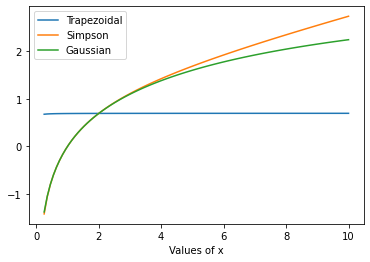

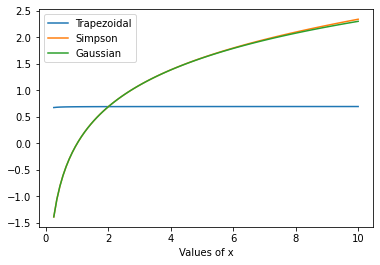

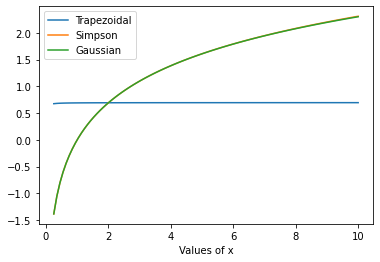

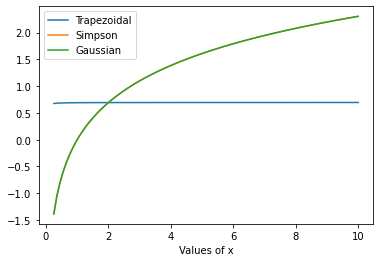

In [108]:
### Compute ln(x) via the three integration estimates of (1/t) and compare with 
### np.log(x).
def myinvt(t):
    return 1/t


### Compute integral of myinv(t) using the three methods and compare with np.log(x)


i=1# we take 500 points in the range given
points_of_x = np.linspace(0.25, 10, 100)


for i in range(3,16,4):
    trap = []  # defining for trapezoidal method
    trap_error = []

    simp = []  # defining for simpson's method
    simp_error = []

    gaussian = []  # defining for gaussian method
    gaussian_error = []

    log_Value = []  # true value of log for all the points

    for j in points_of_x:
        log_Value.append(np.log(j))

        trap.append(mytrapezoid(myinvt, 1,j, i))
        simp.append(mysimpson(myinvt, 1,j, i))
        gaussian.append(myGaussianint(myinvt, 1, j,i))
        
    
    
#         trap_error.append((abs(np.log(j)-mytrapezoid(myinvt, 1, j, i)))/abs(np.log(j)))
#         simp_error.append(abs(np.log(j)-mysimpson(f, 1, j, i))/abs(np.log(j)))
#         gaussian_error.append(abs(np.log(j)-myGaussianint(myinvt, 1,j, i))/abs(np.log(j)))


    plt.plot(points_of_x, trap, label='Trapezoidal')
    plt.plot(points_of_x, simp, label='Simpson')
    plt.plot(points_of_x, gaussian, label='Gaussian')
#     plt.plot(points_of_x, trap_error, label='Trapezoidal Error')
#     plt.plot(points_of_x, simp_error, label='Simpson Error')
#     plt.plot(points_of_x, gaussian_error, label='Gaussian Error')
#     plt.plot(points_of_x, log_Value, label='True log value')
    plt.xlabel("Values of x")
    plt.legend()
    plt.show()


***
### Q.4 Let $\sigma(x,y) = (x,y,z=x^2+y^2),x\in [-1,1],y \in [-1,1]$ be the parametric representation of a paraboloid. The area of this surface is given by: $$\int_{-1}^1 \left(\int_{-1}^1 \sqrt{1+4x^2+4y^2}\ \ dx \right)\ \ dy. $$ Numerical estimate the area by estimating the double integral using Gaussian numerical integration method. Compare your estimate with the estimate obtained from the in-built numerical double integration from scipy by running the following code:
`f = lambda x, y: (1 + 4*(x ** 2 + y ** 2))**(0.5)
integrate.dblquad(f,-1,1,-1,1)`

In [109]:
### Estimate the double integral using Gaussian numerical integration, and compare with the numerical integration from scipy.
# Numerical integration by Gaussian Numerical integration method.
def f(x, y):
    return (1 + 4*(x ** 2 + y ** 2))**(0.5)

def myGaussianint(f, n):
    x, wx = roots_legendre(n)
    y, wy = roots_legendre(n)
    sum = 0
    
    for i in range(n):
        for j in range(n):
            sum += wx[i] * wy[j] * f(x[i], y[j])

    return sum


area = myGaussianint(f, n)
print('area = ', area)
area_through_scipy, error = integrate.dblquad(f, -1, 1, -1, 1)
print('area through scipy = ', area_through_scipy)
print('error = ', area - area_through_scipy)


area =  7.446256723012355
area through scipy =  7.446256723012359
error =  -4.440892098500626e-15


AS THE ERROR IS NEGATIVE THAT MEANS THE AREA FOUNDED BY GAUSSIAN IS LESS THAN THE AREA BY INBUILT FUNCTION.
SO OUR APPROXIMATION HAS ERROR OF -4.1389114358025836e-13.